In [1]:
import cv2
from PIL import Image
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
path = r"C:\Users\Aviral\Downloads\histo_image.jpg"
imagepath = r"C:\Users\Aviral\Downloads\imgs-20210106T132422Z-001\imgs"
maskpath = r"C:\Users\Aviral\Downloads\msks-20210106T132444Z-001\msks"

In [ ]:
for infile in os.listdir(maskpath):
    print("file : " + infile)
    if infile[-3:] == "TIF" or infile[-3:] == "bmp" :
       # print "is tif or bmp"
       outfile = infile[:-3] + "jpeg"
       im = Image.open(os.path.join(maskpath,infile))
       print("new filename : " + outfile)
       out = im.convert("RGB")
       out.save(outfile, "JPEG", quality=100)

In [21]:
i=1
for im in os.listdir(r"C:\Users\Aviral\Documents\Project\jpg masks"):
    im = cv2.imread(os.path.join(r"C:\Users\Aviral\Documents\Project\jpg masks",im))
    im = cv2.resize(im,(512,512))
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    plt.imsave('mask_'+str(i)+'.jpg',im)    
    i=i+1

In [8]:
im = cv2.imread(path)
im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)

In [9]:
n = 2    # Number of levels of quantization

indices = np.arange(0,256)   # List of all colors 

divider = np.linspace(0,255,n+1)[1] # we get a divider

quantiz = np.int0(np.linspace(0,255,n)) # we get quantization colors

color_levels = np.clip(np.int0(indices/divider),0,n-1) # color levels 0,1,2..

palette = quantiz[color_levels] # Creating the palette

img = palette[im]  # Applying palette on image

img = cv2.convertScaleAbs(img) # Converting image back to uint8

In [17]:
i=1
for im in os.listdir(r"C:\Users\Aviral\Documents\IITR Project\nucleisegmentationbenchmark\nucleisegmentationbenchmark\Test Images\train"):
    im = cv2.imread(os.path.join(r"C:\Users\Aviral\Documents\IITR Project\nucleisegmentationbenchmark\nucleisegmentationbenchmark\Test Images\train",im))
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)

    n = 2    # Number of levels of quantization

    indices = np.arange(0,256)   # List of all colors 

    divider = np.linspace(0,255,n+1)[1] # we get a divider

    quantiz = np.int0(np.linspace(0,255,n)) # we get quantization colors

    color_levels = np.clip(np.int0(indices/divider),0,n-1) # color levels 0,1,2..

    palette = quantiz[color_levels] # Creating the palette

    img = palette[im]  # Applying palette on image

    img = cv2.convertScaleAbs(img) # Converting image back to uint8
    
    ret1,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)

    #th1 = cv2.cvtColor(th1, cv2.COLOR_BGR2GRAY)
    
    th1 = cv2.bitwise_not(th1)
    
    th1 = cv2.resize(th1,(512,512))
    
    plt.imsave('image_'+str(i)+'.jpg',th1[:,:,0])
    
    i=i+1

In [ ]:
img.shape

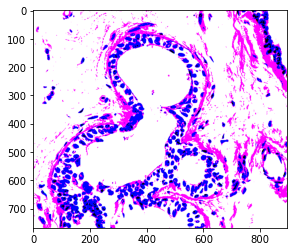

In [10]:
plt.imshow(img)
plt.show()

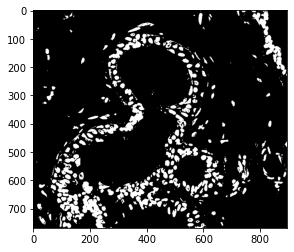

In [13]:
ret1,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
#th1 = cv2.cvtColor(th1, cv2.COLOR_BGR2GRAY)
th1 = cv2.bitwise_not(th1)
plt.imshow(th1[:,:,0], cmap='gray')
plt.show()

Merge Images to create dataset

In [29]:
images = sorted(os.listdir(r"C:\Users\Aviral\Documents\Project\processed images"))
masks = sorted(os.listdir(r"C:\Users\Aviral\Documents\Project\resized masks"))
print(len(images))
print(len(masks))

58
58


In [30]:
for i in range(len(images)):
    img1 = cv2.imread(os.path.join(r"C:\Users\Aviral\Documents\Project\processed images",images[i])) 
    img2 = cv2.imread(os.path.join(r"C:\Users\Aviral\Documents\Project\resized masks",masks[i]))

    new_im = cv2.hconcat([img1, img2]) 
    
    cv2.imwrite('merged_'+str(i)+'.jpg',new_im)